In [1]:
from importlib.resources import files

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
dt_execute_rbg = pd.read_pickle("result/Execute RBG.pkl.gz")
dt_start_handle_request = pd.read_pickle("result/Start Handle Request.pkl.gz")
dt_end_handle_request = pd.read_pickle("result/End Handle Request.pkl.gz")
dt_path_movement_finished = pd.read_pickle("result/Path Movement Finished.pkl.gz")
dt_path_movement_finished_detail = pd.read_pickle("result/Path Movement Finished - Detail.pkl.gz")
dt_path_movement_failed = pd.read_pickle("result/Path Movement Failed.pkl.gz")
dt_unknown = pd.read_pickle("result/Unknown Content.pkl.gz")
dt_alerts_handled = pd.read_pickle("result/Alerts Handled.pkl.gz")
dt_alerts_processing = pd.read_pickle("result/Alerts Processing.pkl.gz")
dt_alerts_received = pd.read_pickle("result/Alerts Received.pkl.gz")
dt_telegrams_processed = pd.read_pickle("result/Telegrams Processed.pkl.gz")
dt_telegrams_sent = pd.read_pickle("result/Telegrams Sent.pkl.gz")
dt_is_position_ok = pd.read_pickle("result/Check Position.pkl.gz")
dt_check_sequence = pd.read_pickle("result/Check Sequence.pkl.gz")
dt_is_vb_ok = pd.read_pickle("result/Is VB OK.pkl.gz")
dt_get_set_nio = pd.read_pickle("result/Get Set NIO.pkl.gz")
dt_log_output = pd.read_pickle("result/parsed_log_output.pkl.gz")
dt_log_output = pd.DataFrame(dt_log_output)

In [3]:
# Change Format to Timestamp
dt_start_handle_request['timestamp'] = pd.to_datetime(
    dt_start_handle_request['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_end_handle_request['timestamp'] = pd.to_datetime(
    dt_end_handle_request['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_execute_rbg['timestamp'] = pd.to_datetime(
    dt_execute_rbg['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_finished['timestamp'] = pd.to_datetime(
    dt_path_movement_finished['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_finished_detail['timestamp'] = pd.to_datetime(
    dt_path_movement_finished_detail['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_failed['timestamp'] = pd.to_datetime(
    dt_path_movement_failed['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_is_position_ok['timestamp'] = pd.to_datetime(
    dt_is_position_ok['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_check_sequence['timestamp'] = pd.to_datetime(
    dt_check_sequence['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_is_vb_ok['timestamp'] = pd.to_datetime(
    dt_is_vb_ok['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_handled['timestamp'] = pd.to_datetime(
    dt_alerts_handled['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_processing['timestamp'] = pd.to_datetime(
    dt_alerts_processing['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_received['timestamp'] = pd.to_datetime(
    dt_alerts_received['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_telegrams_processed['timestamp'] = pd.to_datetime(
    dt_telegrams_processed['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_telegrams_sent['timestamp'] = pd.to_datetime(
    dt_telegrams_sent['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_get_set_nio['timestamp'] = pd.to_datetime(
    dt_get_set_nio['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_log_output[0] = pd.to_datetime(
    dt_log_output[0], format="%Y.%m.%d %H:%M:%S.%f"
)

In [4]:
# Regarding INFO CODE
# dt_path_movement_failed['info_code'] -> only W
# dt_check_sequence['info_code'] -> only W
# dt_is_position_ok['info_code'] -> W and I
# dt_unknown -> I, W, E
# the rest only I

In [5]:
# Separate the LamTask into multiple row with single le each row

# Step 1: Ensure 'le' is a string
dt_execute_rbg['le'] = dt_execute_rbg['le'].astype(str)

# Step 2: Split and explode
dt_execute_rbg_split = dt_execute_rbg.assign(
    le=dt_execute_rbg['le'].str.split(r',\s*')  # split on comma and optional space
).explode('le')

# Step 3: Optional - strip whitespace
dt_execute_rbg_split['le'] = dt_execute_rbg_split['le'].str.strip()

In [6]:
# Change the format of Paths from list of dict into arrow

def format_paths(path_list):
    if isinstance(path_list, list):
        return ', '.join(f"{p['from']} -> {p['to']}" for p in path_list if 'from' in p and 'to' in p)
    return ''

# run the formatting only once, if needed to refresh the dataframe then re-do from the top
dt_path_movement_finished['paths'] = dt_path_movement_finished['paths'].apply(format_paths)


In [7]:
# why we assume that le == mfs_id

# dt_log_output[(dt_log_output[3] == 'G61977226') & (dt_log_output[5].astype(str).str.contains('1852930'))] # execute rbg & path movement
# dt_log_output[(dt_log_output[3] == 'G42069692') & (dt_log_output[5].astype(str).str.contains('1847243'))] # nio & alert
# dt_log_output[(dt_log_output[3] == 'G41852050') & (dt_log_output[5].astype(str).str.contains('1847002'))] # handle request & check position
dt_log_output[(dt_log_output[3] == 'G41859241') & (dt_log_output[5].astype(str).str.contains('1847012'))] # execute rbg & path movement

,0,1,2,3,4,5
7976377,2025-02-06 06:00:19.492,I,MF2,G41859241,lis.mfs.business.rbg.RbgStrategyService.execut...,"TASK_ID: 107, TASK_TYPE: SingleTask CATEGORY: ..."
7976394,2025-02-06 06:00:19.883,I,MF2,G41859241,lis.mfs.business.rbg.RbgStrategyService.execut...,"try execute Task: TASK_ID: 107, TASK_TYPE: Sin..."
7976395,2025-02-06 06:00:19.883,I,MF2,G41859241,getPathForMovement,"path search finished -- mfsId: 1847012; [true,..."


In [11]:
# combine several table to know the movement of each le

start_df = dt_start_handle_request[['timestamp', 'mfs_id', 'force_check', 'operation_num']].copy()
start_df.rename(columns={'mfs_id': 'le'}, inplace=True)
start_df.rename(columns={'force_check': 'additional_data'}, inplace=True)
start_df['additional_data'] = 'force_check: ' + start_df['additional_data'].astype(str)
start_df['event'] = 'start_handle_request'

end_df = dt_end_handle_request[['timestamp', 'mfs_id', 'result', 'operation_num']].copy()
end_df.rename(columns={'mfs_id': 'le'}, inplace=True)
end_df.rename(columns={'result': 'additional_data'}, inplace=True)
end_df['additional_data'] = 'result: ' + end_df['additional_data'].astype(str)
end_df['event'] = 'end_handle_request'

# use the split instead of the original so there is no multiple value in le column
execute_rbg_df = dt_execute_rbg_split[['timestamp', 'le', 'fail_status', 'operation_num']].copy()
execute_rbg_df.rename(columns={'fail_status': 'additional_data'}, inplace=True)
execute_rbg_df['additional_data'] = 'fail_status: ' + execute_rbg_df['additional_data'].astype(str)
execute_rbg_df['event'] = 'execute_rbg'

path_movement_df = dt_path_movement_finished[['timestamp', 'mfs_id', 'paths', 'operation_num']].copy()
path_movement_df.rename(columns={'mfs_id': 'le'}, inplace=True)
path_movement_df.rename(columns={'paths': 'additional_data'}, inplace=True)
path_movement_df['additional_data'] = 'paths: ' + path_movement_df['additional_data'].astype(str)
path_movement_df['event'] = 'path_movement_finished'

position_df = dt_is_position_ok[['timestamp', 'id', 'status', 'operation_num']].copy()
position_df.rename(columns={'id': 'le'}, inplace=True)
position_df.rename(columns={'status': 'additional_data'}, inplace=True)
position_df['additional_data'] = 'status: ' + position_df['additional_data'].astype(str)
position_df['event'] = 'is_position_ok'

check_sequence_df = dt_check_sequence[['timestamp', 'id', 'returned', 'operation_num']].copy()
check_sequence_df.rename(columns={'id': 'le'}, inplace=True)
check_sequence_df.rename(columns={'returned': 'additional_data'}, inplace=True)
check_sequence_df['additional_data'] = 'returned: ' + check_sequence_df['additional_data'].astype(str)
check_sequence_df['event'] = 'check_sequence'

is_vb_ok_df = dt_is_vb_ok[['timestamp', 'id', 'vb_status', 'operation_num']].copy()
is_vb_ok_df.rename(columns={'id': 'le'}, inplace=True)
is_vb_ok_df.rename(columns={'vb_status': 'additional_data'}, inplace=True)
is_vb_ok_df['additional_data'] = 'data: ' + is_vb_ok_df['additional_data'].astype(str)
is_vb_ok_df['event'] = 'is_vb_ok'

get_set_nio_df = dt_get_set_nio[['timestamp', 'id', 'send_to', 'operation_num']].copy()
get_set_nio_df.rename(columns={'id': 'le'}, inplace=True)
get_set_nio_df.rename(columns={'send_to': 'additional_data'}, inplace=True)
get_set_nio_df['additional_data'] = 'send to: ' + get_set_nio_df['additional_data'].astype(str)
get_set_nio_df['event'] = 'get_set_nio'

combined_le_df = pd.concat([start_df, end_df, execute_rbg_df, path_movement_df, position_df, check_sequence_df, is_vb_ok_df, get_set_nio_df], ignore_index=True)
# combined_le_df = pd.concat([start_df, end_df, path_movement_df, position_df, check_sequence_df, is_vb_ok_df, get_set_nio_df], ignore_index=True)
combined_le_df = combined_le_df.sort_values(by=['le', 'timestamp'])

event_counts = (
    combined_le_df
    .groupby(['le', 'event'])
    .size()
    .unstack(fill_value=0)  # Optional: to make it wide-form table
    .reset_index()
)


le_event_summary = (
    combined_le_df
    .groupby('le')['timestamp']
    .agg(
        event_count='count',
        first_timestamp='min',
        last_timestamp='max'
    )
    .reset_index()
)

# Optional: Add duration in seconds
le_event_summary['duration_sec'] = (le_event_summary['last_timestamp'] - le_event_summary['first_timestamp']).dt.total_seconds()
# 11280 unique le

In [12]:
event_counts

event,le,check_sequence,end_handle_request,execute_rbg,get_set_nio,is_position_ok,is_vb_ok,path_movement_finished,start_handle_request
0,1846998,1,39,198,0,3,36,55,39
1,1846999,1,35,141,0,3,32,51,35
2,1847000,1,39,193,0,3,36,57,39
3,1847001,1,38,175,0,3,35,56,38
4,1847002,1,3,24,0,3,0,10,3
...,...,...,...,...,...,...,...,...,...
11275,1858274,26,121,218,0,31,90,123,121
11276,1858275,1,36,121,0,3,33,54,36
11277,1858276,59,73,43,0,61,12,22,73
11278,1858277,1,34,96,0,3,31,52,34


In [13]:
le_event_summary

,le,event_count,first_timestamp,last_timestamp,duration_sec
0,1846998,371,2025-02-06 05:58:06.365,2025-02-06 06:08:23.205,616.840
1,1846999,298,2025-02-06 05:58:06.365,2025-02-06 06:04:36.107,389.742
2,1847000,368,2025-02-06 05:58:06.365,2025-02-06 06:07:04.490,538.125
3,1847001,346,2025-02-06 05:58:06.365,2025-02-06 06:06:20.247,493.882
4,1847002,44,2025-02-06 05:58:06.240,2025-02-06 06:00:18.336,132.096
...,...,...,...,...,...
11275,1858274,730,2025-02-13 19:08:07.291,2025-02-13 19:13:10.812,303.521
11276,1858275,284,2025-02-13 19:08:18.011,2025-02-13 19:14:23.735,365.724
11277,1858276,343,2025-02-13 19:08:18.011,2025-02-13 19:11:49.677,211.666
11278,1858277,251,2025-02-13 19:08:18.011,2025-02-13 19:14:02.106,344.095


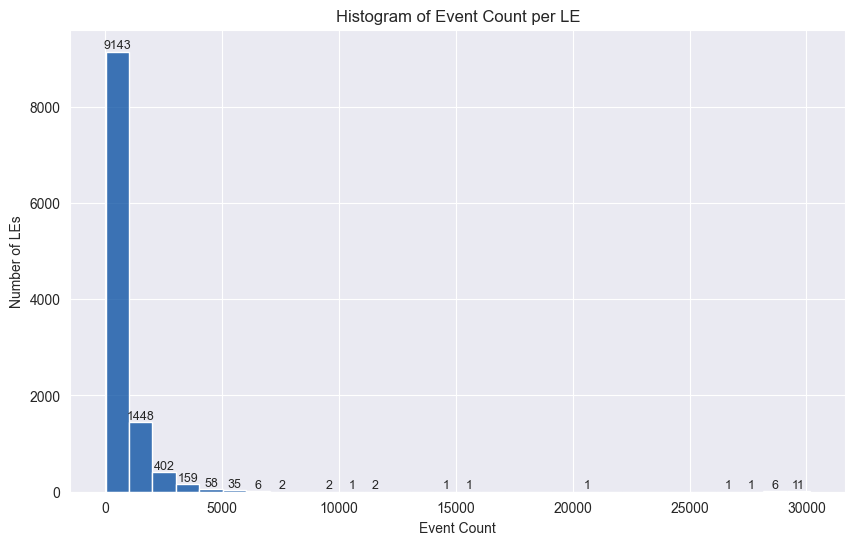

In [14]:
plt.figure(figsize=(10, 6))
rgb_wiso = (0, 74, 159)
custom_rgb = tuple([x / 255 for x in rgb_wiso])
sns.histplot(le_event_summary['event_count'], bins=30, color=custom_rgb)
ax = plt.gca()

# Add text labels above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # skip empty bars
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Histogram of Event Count per LE')
plt.xlabel('Event Count')
plt.ylabel('Number of LEs')
plt.grid(True)
plt.show()

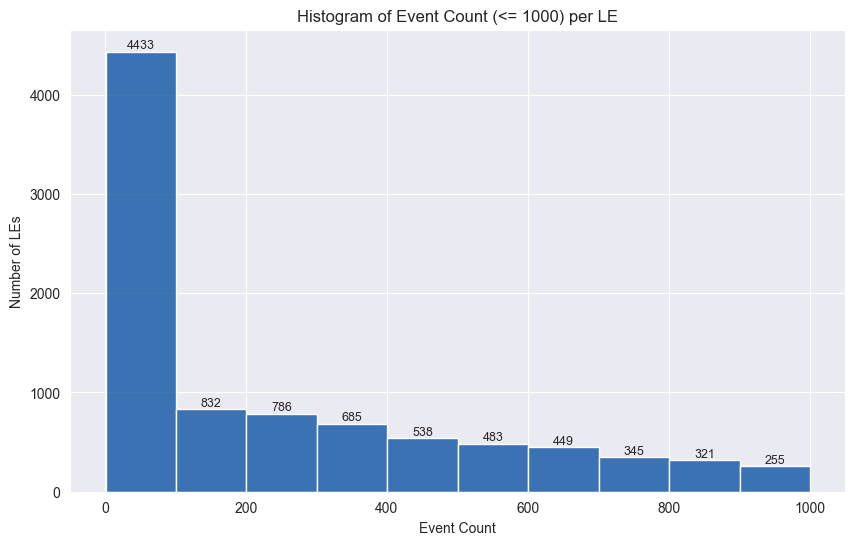

In [15]:
# Filter only rows with event_count <= 1000
filtered_summary = le_event_summary[le_event_summary['event_count'] <= 1000]

# Plot the histogram for the filtered data
plt.figure(figsize=(10, 6))
rgb_wiso = (0, 74, 159)
custom_rgb = tuple([x / 255 for x in rgb_wiso])
sns.histplot(filtered_summary['event_count'], bins=10, color=custom_rgb)
ax = plt.gca()

# Add text labels above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # skip empty bars
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )
plt.title('Histogram of Event Count (<= 1000) per LE')
plt.xlabel('Event Count')
plt.ylabel('Number of LEs')
plt.grid(True)
plt.show()

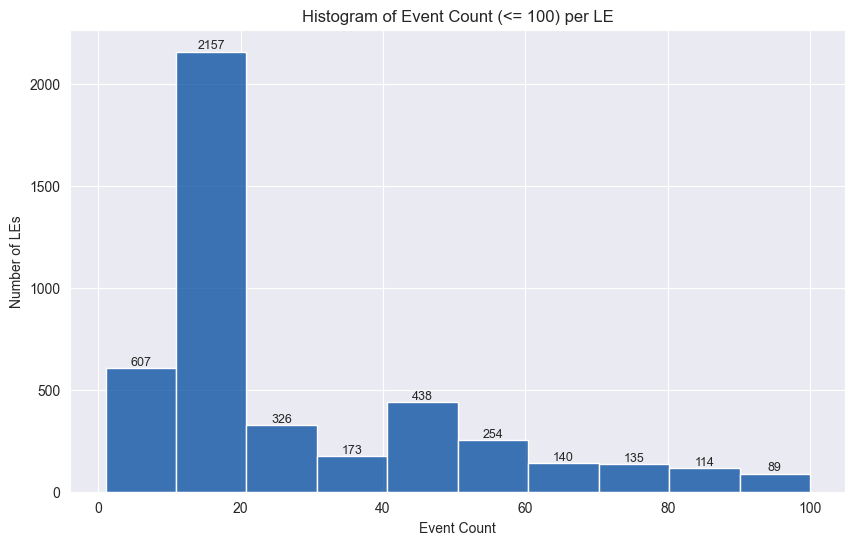

In [15]:
# Filter only rows with event_count <= 100
filtered_summary = le_event_summary[le_event_summary['event_count'] <= 100]

# Plot the histogram for the filtered data
plt.figure(figsize=(10, 6))
rgb_wiso = (0, 74, 159)
custom_rgb = tuple([x / 255 for x in rgb_wiso])
sns.histplot(filtered_summary['event_count'], bins=10, color=custom_rgb)
ax = plt.gca()

# Add text labels above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # skip empty bars
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )
plt.title('Histogram of Event Count (<= 100) per LE')
plt.xlabel('Event Count')
plt.ylabel('Number of LEs')
plt.grid(True)
plt.show()

In [17]:
le_with_high_event_count = le_event_summary[(le_event_summary['event_count'] > 5000)]['le'].unique()
print("Total LE with High Event Count:", len(le_with_high_event_count))
print(le_with_high_event_count)
# over 20,000 | all 7 events
# ['1849215' '1850043' '1850049' '1850050' '1850052' '1850053' '1850054'
# '1850055' '1850056' '1850058' '1850060' '1850061' '1850063' '1850064'
# '1850065' '1850067' '1850068' '1850069' '1856824' '1856825']

# between 10k and 20k ['1847773' '1851034' '1852134' '1852136' '1852137'] | all 7 events

# between 5k and 10k: 45 | all 7 events

event_counts_high = (
    combined_le_df[combined_le_df['le'].isin(le_with_high_event_count)]
).groupby('le')['event'].nunique()

# event_counts_high
combined_le_df[(combined_le_df['le'] == '1852137') & (combined_le_df['additional_data'].astype(str).str.contains('fail'))] # everything has FAILURE in execute_rbg
# combined_le_df[(combined_le_df['le'] == '1848897')] 2025-02-07 09:54:18.475

# fail_status:  -- FAILURE: sequence not OK
# fail_status:  -- FAILURE: all outgoing positions are occupied
# fail_status:  -- FAILURE: one of the occupying LHMs does not allow collecting the current task
# fail_status:  -- FAILURE: one or more LAMs are too full for collecting the current task


Total LE with High Event Count: 70
['1847542' '1847606' '1847636' '1847681' '1847740' '1847773' '1849215'
 '1849316' '1849346' '1849353' '1849383' '1849429' '1849928' '1850043'
 '1850049' '1850050' '1850052' '1850053' '1850054' '1850055' '1850056'
 '1850058' '1850060' '1850061' '1850063' '1850064' '1850065' '1850067'
 '1850068' '1850069' '1851034' '1851056' '1851057' '1851058' '1851064'
 '1851065' '1851068' '1851069' '1851070' '1851071' '1851072' '1851074'
 '1851075' '1851081' '1852134' '1852136' '1852137' '1852151' '1852153'
 '1852155' '1852157' '1852160' '1852161' '1852162' '1852165' '1852166'
 '1853265' '1855869' '1856434' '1856446' '1856495' '1856824' '1856825'
 '1857022' '1857126' '1857226' '1857367' '1857380' '1858271' '1858272']


,timestamp,le,additional_data,operation_num,event
3549518,2025-02-09 15:16:04.440,1852137,fail_status: -- FAILURE: all outgoing positio...,G58285264,execute_rbg
3549524,2025-02-09 15:16:04.815,1852137,fail_status: -- FAILURE: all outgoing positio...,G58285277,execute_rbg
3549530,2025-02-09 15:16:05.252,1852137,fail_status: -- FAILURE: all outgoing positio...,G58285291,execute_rbg
3549536,2025-02-09 15:16:05.471,1852137,fail_status: -- FAILURE: all outgoing positio...,G58285299,execute_rbg
3549542,2025-02-09 15:16:05.674,1852137,fail_status: -- FAILURE: all outgoing positio...,G58285308,execute_rbg
...,...,...,...,...,...
3553591,2025-02-09 15:28:58.895,1852137,fail_status: None,G58312984,execute_rbg
3565002,2025-02-09 16:08:45.410,1852137,fail_status: None,G58394789,execute_rbg
3565006,2025-02-09 16:08:45.989,1852137,fail_status: None,G58394789,execute_rbg
3565095,2025-02-09 16:08:55.911,1852137,fail_status: None,G58395330,execute_rbg


In [18]:
# Count the number of unique event types per LE
le_event_type_counts = combined_le_df.groupby('le')['event'].nunique()
le_event_type_unique = combined_le_df.groupby('le')['event'].unique()

# Count how many LEs have 1, 2, 3, ... unique events
le_event_distribution = le_event_type_counts.value_counts().sort_index()

# Convert to DataFrame for easier viewing
le_event_distribution_df = le_event_distribution.reset_index()
le_event_distribution_df.columns = ['unique_event_count', 'num_le']

le_event_distribution_df

,unique_event_count,num_le
0,1,51
1,2,2925
2,4,67
3,5,18
4,6,1242
5,7,6977


In [19]:
# LE that has only 1 unique event

# Filter for LEs that only have 1 unique event type
le_with_one_event_type = le_event_type_counts[le_event_type_counts == 1].index

# Optionally, filter the original DataFrame to see the rows
combined_single_event_le_df = combined_le_df[combined_le_df['le'].isin(le_with_one_event_type)]

# to find the distinct paths from le that only has one event_count
filtered = dt_path_movement_finished[(dt_path_movement_finished['mfs_id'].isin(le_with_one_event_type))]
distinct_paths = filtered[['mfs_id', 'paths']].drop_duplicates()
mfs_ids_to_1772 = distinct_paths[distinct_paths['paths'] == '1746 -> 1772']['mfs_id'].unique()
mfs_ids_to_1057 = distinct_paths[distinct_paths['paths'].isin(['1772 -> 1057', '1003 -> 1057'])]['mfs_id'].unique()
mfs_ids_to_1002 = distinct_paths[distinct_paths['paths'] == '1003 -> 1002']['mfs_id'].unique()
mfs_ids_to_null = distinct_paths[distinct_paths['paths'] == '']['mfs_id'].unique()

distinct_path_le_counts = (
    filtered
    .groupby('paths')['mfs_id']
    .nunique()
    .reset_index(name='distinct_le_count')
    .sort_values(by='distinct_le_count', ascending=False)
)

# View the result
combined_single_event_le_df
# distinct_paths
# distinct_path_le_counts
# combined_le_df[combined_le_df['le'] == '1847230']

,timestamp,le,additional_data,operation_num,event
4858001,2025-02-06 06:44:21.144,1847230,paths: 1772 -> 1057,G41984226,path_movement_finished
4859071,2025-02-06 06:48:51.942,1847233,"paths: 1772 -> 1745, 1745 -> 1746",G41997772,path_movement_finished
4859088,2025-02-06 06:48:55.195,1847233,"paths: 1772 -> 1745, 1745 -> 1746",G41997844,path_movement_finished
4859097,2025-02-06 06:49:09.196,1847233,paths:,G41998797,path_movement_finished
4859115,2025-02-06 06:49:15.260,1847233,paths: 1745 -> 1746,G41999146,path_movement_finished
...,...,...,...,...,...
5932394,2025-02-13 13:52:43.847,1857894,paths: 1003 -> 1002,G78301325,path_movement_finished
5932482,2025-02-13 14:01:28.840,1857905,paths: 1003 -> 1002,G78336455,path_movement_finished
5932655,2025-02-13 14:17:19.166,1857917,paths: 1003 -> 1002,G78397581,path_movement_finished
5933058,2025-02-13 14:42:17.911,1857967,paths: 1003 -> 1002,G78497397,path_movement_finished


In [20]:
# last path occurrence
last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(le_with_one_event_type)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)

'''
# last path occurrence for le that goes to 1057
last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(mfs_ids_to_1057)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)
'''

'''
# last path occurrence for le that goes to null
last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(mfs_ids_to_null)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)
'''

'''
# last path occurrence for le that goes to 1772
last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(mfs_ids_to_1772)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)
'''

'''
# last path occurrence for le that goes to 1002
last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(mfs_ids_to_1002)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)
'''

last_occurrence_df

,mfs_id,timestamp,info_code,thread,operation_num,search_status,status,code,paths
0,1847230,2025-02-06 06:44:21.144,I,MF1,G41984226,finished,true,0,1772 -> 1057
1,1847233,2025-02-06 06:49:52.143,I,MF1,G42000751,finished,true,0,1745 -> 1746
2,1847235,2025-02-06 06:51:39.057,I,MF1,G42005082,finished,true,0,1745 -> 1746
3,1847237,2025-02-06 06:53:05.424,I,MF1,G42010588,finished,true,0,1745 -> 1746
4,1847239,2025-02-06 06:54:44.253,I,MF1,G42016714,finished,true,0,1745 -> 1746
5,1847241,2025-02-06 06:55:53.761,I,MF1,G42021167,finished,true,0,1745 -> 1746
6,1847242,2025-02-06 06:58:25.753,I,MF1,G42031441,finished,true,0,1745 -> 1746
7,1847281,2025-02-06 07:24:58.469,I,MF1,G42101666,finished,true,0,1745 -> 1746
8,1847380,2025-02-06 07:35:01.572,I,MF1,G42133867,finished,true,0,1745 -> 1746
9,1847382,2025-02-06 07:35:48.360,I,MF1,G42136293,finished,true,0,1745 -> 1746


In [21]:
le_path_failed = dt_path_movement_failed['mfs_id'].unique()
print("Total LE in Path Movement Failed:", len(le_path_failed))

# last path occurrence
last_occurrence_failed_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(le_path_failed)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)

# Keep only relevant columns
df1 = dt_path_movement_failed[['timestamp', 'mfs_id', 'path_from', 'path_to']].rename(columns={'timestamp': 'timestamp_failed'})
df2 = last_occurrence_failed_df[['timestamp', 'mfs_id', 'paths']].rename(columns={'timestamp': 'timestamp_last'})

# join on 'mfs_id'
merged_df = pd.merge(df1, df2, on='mfs_id', how='inner')

# Calculate the time difference
merged_df['time_difference'] = (merged_df['timestamp_last'] - merged_df['timestamp_failed']).dt.total_seconds()

le_failed_to_none = merged_df[merged_df['paths'] == '']['mfs_id'].unique()
print("Total LE in Path Movement Failed which retry is None:", len(le_failed_to_none))
print(le_failed_to_none)

# last_occurrence_failed_df
# merged_df
dt_path_movement_failed[(dt_path_movement_failed['mfs_id'].isin(le_failed_to_none))]

Total LE in Path Movement Failed: 10924
Total LE in Path Movement Failed which retry is None: 40
['1847007' '1847599' '1849351' '1849441' '1849325' '1849338' '1849389'
 '1849658' '1850089' '1850100' '1850201' '1850222' '1850705' '1850873'
 '1850810' '1851021' '1851147' '1851988' '1852016' '1852546' '1852529'
 '1852727' '1852770' '1853040' '1853209' '1853103' '1853173' '1853283'
 '1853405' '1854302' '1854308' '1854602' '1856052' '1856262' '1857116'
 '1857201' '1857772' '1858127' '1858171' '1858253']


,timestamp,info_code,thread,operation_num,search_status,mfs,mfs_id,path_from,path_to,check_local,check_remote,dist_type,save_way,min_dist,failcode
2,2025-02-06 05:59:40.131,W,MF1,G41857252,failed,1,1847007,1631,1726,63,8,0,true,0,-2
14,2025-02-06 06:01:19.779,W,MF1,G41862867,failed,1,1847007,1631,1726,63,8,0,true,0,-2
24,2025-02-06 06:02:59.102,W,MF1,G41869328,failed,1,1847007,1631,1726,63,8,0,true,0,-2
39,2025-02-06 06:04:38.451,W,MF1,G41875711,failed,1,1847007,1631,1726,63,8,0,true,0,-2
46,2025-02-06 06:06:17.560,W,MF1,G41881911,failed,1,1847007,1631,1726,63,8,0,true,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26725,2025-02-13 17:37:41.669,W,MF1,G79098751,failed,1,1858253,1631,1746,63,8,0,true,0,-2
26738,2025-02-13 17:39:20.799,W,MF1,G79105225,failed,1,1858253,1631,1746,63,8,0,true,0,-2
26749,2025-02-13 17:40:59.806,W,MF1,G79111819,failed,1,1858253,1631,1746,63,8,0,true,0,-2
26754,2025-02-13 17:42:38.322,W,MF1,G79118360,failed,1,1858253,1631,1746,63,8,0,true,0,-2


In [23]:
# To check for last log entry

# Get Set NIO, sent to 1002: 1848047 G43315770, 1848114 G43419877
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1848047')) | (dt_log_output[3].isin(['G43315770']))]
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1848114')) | (dt_log_output[3].isin(['G43419877']))]

# Goes to 1057: 1847230, 1849286, 1854307
dt_log_output[(dt_log_output[5].astype(str).str.contains('1849286'))]
# dt_log_output[dt_log_output[3].isin(['G66893120'])]



,0,1,2,3,4,5
2220986,2025-02-07 11:08:10.972,I,MF1,G47741993,send,Alert TSS_FROMMF1 wurde gesendet. Text: '1003\...
2220987,2025-02-07 11:08:10.972,I,MF1,G47741993,s.business.telegram.TelegramSenderService.send...,telegram sended: DO; text: 1003\0\DO\0\1003\10...
2220989,2025-02-07 11:08:10.972,I,MF1,G47741993,send,Alert LHM_AUFGESETZT_1003 wurde gesendet. Text...
2220990,2025-02-07 11:08:10.972,I,MF1,G47741993,business.telegram.TelegramSenderService.sendAV...,telegram sended: LHM_AUFGESETZT_1003; text: \M...
2220999,2025-02-07 11:08:11.175,I,Alert-Thread,G47742001,mainLoop,Alert empfangen: Name=MFS_START_1003 Text=PLAT...
2221014,2025-02-07 11:08:11.784,I,MF1,G47742023,com.hl.hilis.mfs.business.MfsAvService.mfsStart,start processing MFS_START_1003: PLATZ=1003\ZI...
2221018,2025-02-07 11:08:11.800,I,MF1,G47742023,alertHandler(),Alert MFS_START_1003 wurde verarbeitet. Text: ...
2221028,2025-02-07 11:08:12.206,I,MF1,G47742034,getPathForMovement,"path search finished -- mfsId: 1849286; [true,..."
2221029,2025-02-07 11:08:12.206,I,MF1,G47742034,send,Alert TSS_FROMMF1 wurde gesendet. Text: '1003\...
2221030,2025-02-07 11:08:12.206,I,MF1,G47742034,s.business.telegram.TelegramSenderService.send...,telegram sended: TA; text: 1003\0\TA\0\1003\10...


In [30]:
nio_op_num = get_set_nio_df['operation_num'].unique()

print(len(nio_op_num))
keine_mfs = dt_log_output[(dt_log_output[3].isin(nio_op_num)) & (dt_log_output[5] == 'keine mfs_id gefunden. erzeuge neues MfsTrans')][3]

print(len(keine_mfs))

no_keine_msg = set(nio_op_num) - set(keine_mfs)
print(no_keine_msg)

# dt_log_output[dt_log_output[3].isin(no_keine_msg)]
# id=1854308: send to NIO=1746 (AUSSCHLEUSEN)
# id=1849217: send to NIO=1746 (AUSSCHLEUSEN)
# id=1850100: send to NIO=1746 (AUSSCHLEUSEN)
# id=1853405: send to NIO=1746 (AUSSCHLEUSEN)
# id=1848944: send to NIO=1746 (AUSSCHLEUSEN)
# id=1849441: send to NIO=1746 (AUSSCHLEUSEN)

# dt_log_output[(dt_log_output[5].astype(str).str.contains('1854308'))] #LHM_LOESCHEN
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1854308'))] # LHM_LOESCHEN
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1849217'))] # LHM_ABGENOMMEN_1746 & MF1_FROMTSS
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1850100'))] # LHM_LOESCHEN
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1853405'))] # LHM_LOESCHEN
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1848944'))] # LHM_LOESCHEN & MF1_FROMTSS
# dt_log_output[(dt_log_output[5].astype(str).str.contains('1849441'))] # LHM_LOESCHEN

dt_log_output[dt_log_output[3].isin(nio_op_num)]

468
462
{'G47947711', 'G51086938', 'G66893100', 'G47672003', 'G62199823', 'G47471066'}


,0,1,2,3,4,5
29654,2025-02-10 05:27:26.069,I,MF1,G61292754,processAlert,"Start Alert-Verarbeitung: Alert=MF1_FROMTSS,Lf..."
29655,2025-02-10 05:27:26.069,W,MF1,G61292754,com.hl.hilis.mfs.business.MfsFmRbgService.fa,keine mfs_id gefunden. erzeuge neues MfsTrans
29656,2025-02-10 05:27:26.084,I,MF1,G61292754,ness.mfs.MfsProjectService.getAndSetNioDestina...,id=1852304: send to NIO=1746 (AUSSCHLEUSEN)
29657,2025-02-10 05:27:26.100,I,MF1,G61292754,s.business.mfs.MfsService.sendLhmWirdAusgeschl...,send telegram to AV: av-tel-id=SND_LHM_WIRD_AU...
29658,2025-02-10 05:27:26.100,I,MF1,G61292754,send,Alert LHM_WIRD_AUSGESCHLEUST wurde gesendet. T...
...,...,...,...,...,...,...
10008749,2025-02-07 13:51:55.194,I,MF1,G48138979,s.business.mfs.MfsService.sendLhmWirdAusgeschl...,send telegram to AV: av-tel-id=SND_LHM_WIRD_AU...
10008750,2025-02-07 13:51:55.210,I,MF1,G48138979,send,Alert LHM_WIRD_AUSGESCHLEUST wurde gesendet. T...
10008751,2025-02-07 13:51:55.210,I,MF1,G48138979,business.telegram.TelegramSenderService.sendAV...,telegram sended: LHM_WIRD_AUSGESCHLEUST; text:...
10008753,2025-02-07 13:51:55.210,I,MF1,G48138979,hl.hilis.mfs.business.MfsFmRbgService.fmRbgTel...,"TelegramDispatch processed - success: true, al..."


In [32]:
# Error java in handle request -> 100% the same error
# dt_unknown[dt_unknown['stage'] == 'handleRequest']
dt_log_output[(dt_log_output[1] == 'E') & (dt_log_output[4] == 'is.mfs.business.seq2.SequencePlanner.handleRequest')]

# dt_unknown[dt_unknown['info_code'] == 'E']
# dt_unknown[dt_unknown['data'].astype('str').str.contains("Fehler")]
# dt_unknown[(dt_unknown['stage'] == 'processAlertQueue') & dt_unknown['data'].astype(str).str.contains('Fehler: com.hl.hilis.mfs.business.MfsAvService.mfsLoeschen - MfsTrans not found:')]
# dt_unknown[dt_unknown['stage'] == 'processAlertQueue']['data'].unique()

,0,1,2,3,4,5
719008,2025-02-08 10:11:32.238,E,MF3,G51890224,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
719018,2025-02-08 10:11:32.644,E,MF3,G51890241,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
719028,2025-02-08 10:11:33.051,E,MF3,G51890255,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
719044,2025-02-08 10:11:33.457,E,MF3,G51890270,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
719053,2025-02-08 10:11:33.863,E,MF3,G51890286,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
...,...,...,...,...,...,...
6452334,2025-02-12 09:52:22.737,E,MF3,G72731332,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
6452341,2025-02-12 09:52:22.940,E,MF3,G72731349,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
6452347,2025-02-12 09:52:23.363,E,MF3,G72731382,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
9828954,2025-02-07 12:31:00.108,E,MF3,G47935973,is.mfs.business.seq2.SequencePlanner.handleReq...,Fehler: null\njava.lang.NullPointerException\n...
